# Pandas

## Pandas Dataframe

Pandas is a python package for importing, inspecting, cleaning, aggregating, transforming, and visualizing data. You import pandas as:

```import pandas as pd```


## Creating a dataframe

Pandas introduces a new datatype, the DataFrame.

The dataframe is a two dimensional container that organizes data into rows (samples) and columns (features) much like a spreadsheet. 

We can create a dataframe using a dictionary. The keys of the dictionary will be the columns of the dataframe and the values will be the the row values. So, the values in our dictionary should be lists or numpy arrays.

For example, let's extend our earning dictionary from above. For each key, replace the value with the following lists:

 - month - ['Sept', 'Oct', 'Nov']
 - gross - [22000, 24500, 18000]
 - expenses - [16000, 16000, 8000]
 - net - (gross - expenses)

 Once we have the dict, we can create the dataframe using

 ```earnings_df = pd.DataFrame(earnings)```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
earnings_dict = dict(
    month = ['Sept', 'Oct', 'Nov'],
    gross = [22000, 24500, 18000],
    expenses = [16000, 16000, 8000]
)

earnings_dict

{'month': ['Sept', 'Oct', 'Nov'],
 'gross': [22000, 24500, 18000],
 'expenses': [16000, 16000, 8000]}

We can convert the dictionary into a dataframe using ```pd.DataFrame()```. The keys become the column headers and the associated values become...the values.

A note of caution, to convert a dictionary into a dataframe, the value lists for each column must be the same length.

In [3]:
earnings_df = pd.DataFrame(earnings_dict)

earnings_df

,month,gross,expenses
0,Sept,22000,16000
1,Oct,24500,16000
2,Nov,18000,8000


And like a dictionary, we can append new columns on the fly.

In [4]:
earnings_df['net'] = earnings_df['gross']- earnings_df['expenses']

In [5]:
earnings_df

,month,gross,expenses,net
0,Sept,22000,16000,6000
1,Oct,24500,16000,8500
2,Nov,18000,8000,10000


## Calculations on Columns

When extracting a column, you can use numpy functions to get different measures of those data:

 - .mean()
 - .std()
 - .min()
 - .max()
 - .sum()
 - .unique()

In [6]:
earnings_df['gross']

0    22000
1    24500
2    18000
Name: gross, dtype: int64

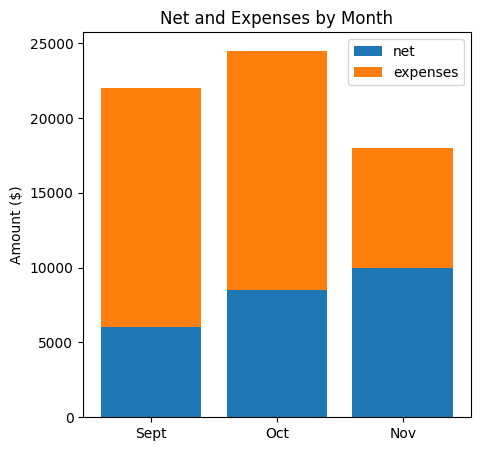

In [7]:
earnings_df['net'] = earnings_df['gross'] - earnings_df['expenses']

fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.bar(earnings_df['month'], earnings_df['net'], label = 'net')
ax.bar(earnings_df['month'], earnings_df['expenses'],
              bottom = earnings_df['net'],
              label = 'expenses')

ax.set_ylabel('Amount ($)')
plt.legend()
plt.title('Net and Expenses by Month')
plt.show()


Pandas has its own custom plotting commands, but its built on matplotlib and the functionality is the same.

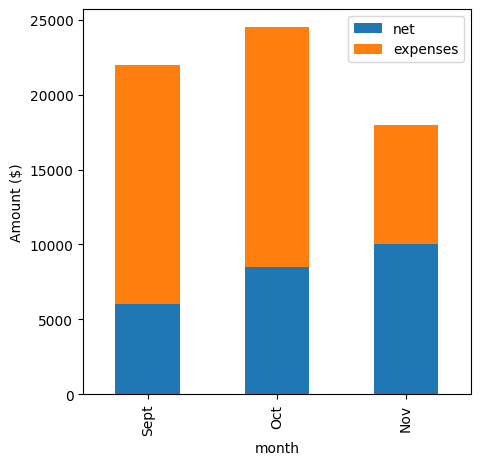

In [8]:
fig, ax = plt.subplots(1,1, figsize = (5,5))

earnings_df.plot(
    x='month',
    y=['net', 'expenses'],
    kind='bar',
    stacked=True,
    ax = ax
)

ax.set_ylabel('Amount ($)')
plt.show()



## Importing and Inspecting Data

Most of the time, we'll be using data that exist outside of Python, either data that somebody else has collected or data that we've collected and saved to some other kind of file (.csv, .json, etc). We'll import data into the dataframe using:

```df = pd.read_csv(data.csv)```

Where ```data.csv``` could be a filepath on your computer or a url to a file that exists online. There are other commands that allow pandas to import a variety of data filetypes.

Once a file is imported, we can inspect the data using:

 - ```df.head(n)``` - Look at the first n rows (5 rows by default, if you omit n)
 - ```df.tail(n)``` - Look at the last n rows
 - ```df.describe()``` - Get information and statistics of the data
 - ```df.columns``` - Get a list of feature names

We'll import and inspect the Marvel Cinematic Universe (MCU) Movies & Series dataset, compiled by Stephen Tracy and published on Kaggle: https://www.kaggle.com/datasets/stevetracy/marvel-cinematic-universe-mcu-movies-and-series

## Example: MCU dataset

In [9]:
mcu_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/datasets/refs/heads/main/mcu_data_apr_2024.csv')


In [10]:
mcu_df.head()

,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office
0,Iron Man,Movie,1.0,MCU Phase 1,5/2/08,2008.0,94.0,91.0,7.9,79.0,8.6,"$140,000,000","$319,034,126","$266,762,121","$585,796,247"
1,The Incredible Hulk,Movie,1.0,MCU Phase 1,6/13/08,2008.0,67.0,70.0,6.6,61.0,6.8,"$140,000,000","$134,806,913","$128,620,638","$263,427,551"
2,Iron Man 2,Movie,1.0,MCU Phase 1,5/7/10,2010.0,72.0,71.0,6.9,57.0,6.4,"$200,000,000","$312,433,331","$311,500,000","$623,933,331"
3,Thor,Movie,1.0,MCU Phase 1,5/6/11,2011.0,77.0,76.0,7.0,57.0,7.0,"$150,000,000","$181,030,624","$268,295,994","$449,326,618"
4,Captain America: The First Avenger,Movie,1.0,MCU Phase 1,7/22/11,2011.0,79.0,75.0,6.9,66.0,6.8,"$140,000,000","$176,654,505","$193,915,269","$370,569,774"


### Data Cleaning

The data have three main issues:
 - The last two rows are missing all data. Easy fix.
 - Some of the headings have leading and trailing spaces (e.g. ' worldwide_box_office '). Annoying.
 - All the budget and revenue columns list the dollar amounts as strings with $ and commas. Annnoyyyyying.

For now, I'm just cleaning the data for you. We'll cover these tools later.

#### Dropping bad data

Data can be 'bad' for numerous reasons, but most immediately obvious are missing data. We drop missing data with ```df.dropna``` ([dropna documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html))

In [11]:
mcu_df.dropna(axis=0, inplace=True)
mcu_df.tail()

,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office
38,Ant-Man and the Wasp: Quantumania,Movie,5.0,MCU Phase 5,2/17/23,2023.0,46.0,82.0,6.1,48.0,5.5,"$200,000,000","$214,504,909","$261,566,271","$476,071,180"
39,Guardians of the Galaxy Vol. 3,Movie,5.0,MCU Phase 5,5/5/23,2023.0,82.0,94.0,7.9,64.0,7.9,"$250,000,000","$358,995,815","$486,559,962","$845,555,777"
40,Secret Invasion,TV Show,5.0,MCU Phase 5,6/21/23,2023.0,53.0,46.0,5.9,63.0,3.5,"$211,000,000",-,-,-
41,The Marvels,Movie,5.0,MCU Phase 5,11/10/23,2023.0,62.0,82.0,5.6,50.0,3.8,"$270,000,000","$84,500,223","$121,612,709","$206,112,932"
42,Echo,TV Show,5.0,MCU Phase 5,1/9/24,2024.0,71.0,61.0,6.0,62.0,5.2,"$40,000,000",-,-,-


#### Renaming Columns

We can rename columns using the function ```.rename()``` which takes as input a dictionary. The keys of the dictionary are the current column headers and the values are the replacement headers.

In [12]:
rename_dict = {col:col.strip() for col in mcu_df.columns}
mcu_df.rename(columns = rename_dict, inplace=True)

#### Converting strings to numbers

We can use the ```map``` function to modify entries of the DataFrame by some function.

In [13]:

def convert_dollars(entry):
    if entry == ' - ':
        return np.nan
    elif isinstance(entry, str):
        entry = entry.replace('$','').replace(',','')
        return int(entry)
    else:
        return(entry)

money_cols = ['production_budget', 'domestic_box_office','international_box_office', 'worldwide_box_office']
    
mcu_df[money_cols] = mcu_df[money_cols].map(convert_dollars)

#### Inspection

 - What movies/tv shows are on the list?
 - What are the statistics of the numeric columns?

In [14]:
mcu_df['movie_title'].unique()

array(['Iron Man', 'The Incredible Hulk', 'Iron Man 2', 'Thor',
       'Captain America: The First Avenger', 'The Avengers', 'Iron Man 3',
       'Thor: The Dark World', 'Captain America: The Winter Soldier',
       'Guardians of the Galaxy', 'Avengers: Age of Ultron', 'Ant-Man',
       'Captain America: Civil War', 'Doctor Strange',
       'Guardians of the Galaxy Vol. 2', 'Spider-Man: Homecoming',
       'Thor: Ragnarok', 'Black Panther', 'Avengers: Infinity War',
       'Ant-Man and the Wasp', 'Captain Marvel', 'Avengers: Endgame',
       'Spider-Man: Far From Home', 'WandaVision',
       'The Falcon and the Winter Soldier', 'Loki', 'Black Widow',
       'What If…?', 'Shang-Chi and the Legend of the Ten Rings',
       'Eternals', 'Hawkeye', 'Spider-Man: No Way Home', 'Moon Knight',
       'Doctor Strange: Multiverse of Madness', 'Ms. Marvel',
       'Thor: Love and Thunder', 'She-Hulk',
       'Black Panther: Wakanda Forever',
       'Ant-Man and the Wasp: Quantumania',
       'Guar

In [15]:
mcu_df.tail()

,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office
38,Ant-Man and the Wasp: Quantumania,Movie,5.0,MCU Phase 5,2/17/23,2023.0,46.0,82.0,6.1,48.0,5.5,200000000.0,214504909.0,261566271.0,476071180.0
39,Guardians of the Galaxy Vol. 3,Movie,5.0,MCU Phase 5,5/5/23,2023.0,82.0,94.0,7.9,64.0,7.9,250000000.0,358995815.0,486559962.0,845555777.0
40,Secret Invasion,TV Show,5.0,MCU Phase 5,6/21/23,2023.0,53.0,46.0,5.9,63.0,3.5,211000000.0,NaN,NaN,NaN
41,The Marvels,Movie,5.0,MCU Phase 5,11/10/23,2023.0,62.0,82.0,5.6,50.0,3.8,270000000.0,84500223.0,121612709.0,206112932.0
42,Echo,TV Show,5.0,MCU Phase 5,1/9/24,2024.0,71.0,61.0,6.0,62.0,5.2,40000000.0,NaN,NaN,NaN


In [16]:
mcu_describe = mcu_df.describe()

Describe creates another dataframe and we can save this as a variable and interact with it.

## Slicing dataframes

 - ```df.COLUMN_NAME``` or ```df[COLUMN_NAME]``` or ```df.loc[COLUMN_NAME]``` - slice an individual column

 - ```df[LIST_OF_COLUMN_NAMES]``` or ```df.loc[LIST_OF_COLUMN_NAME]```- slice multiple columns

 - ```df.iloc[ROW_INDICES]```- slice multiple rows

How does Pandas know whether you meant to slice a column or a row?

You can 'slice' columns or rows from a dataframe using:

 - ```df[LIST_OF_COLUMN_NAMES].iloc[ROW_INDICES]``` - slice along columns and rows


Let's get the movie_title, release_date, rt_audience_score, metacritic_userscore, production_budget, and worldwide_box_office for the last ten most recent entries (as of the time this list was made).


In [17]:
# A single column
mcu_df['movie_title']

0                                      Iron Man
1                           The Incredible Hulk
2                                    Iron Man 2
3                                          Thor
4            Captain America: The First Avenger
5                                  The Avengers
6                                    Iron Man 3
7                          Thor: The Dark World
8           Captain America: The Winter Soldier
9                       Guardians of the Galaxy
10                      Avengers: Age of Ultron
11                                      Ant-Man
12                   Captain America: Civil War
13                               Doctor Strange
14               Guardians of the Galaxy Vol. 2
15                       Spider-Man: Homecoming
16                               Thor: Ragnarok
17                                Black Panther
18                       Avengers: Infinity War
19                         Ant-Man and the Wasp
20                               Captain

In [18]:
# Mulitple columns as a list
mcu_df[['movie_title', 'release_year']]

,movie_title,release_year
0,Iron Man,2008.0
1,The Incredible Hulk,2008.0
2,Iron Man 2,2010.0
3,Thor,2011.0
4,Captain America: The First Avenger,2011.0
5,The Avengers,2012.0
6,Iron Man 3,2013.0
7,Thor: The Dark World,2013.0
8,Captain America: The Winter Soldier,2014.0
9,Guardians of the Galaxy,2014.0


In [19]:
# Specific rows by index

mcu_df.iloc[5:10]

,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office
5,The Avengers,Movie,1.0,MCU Phase 1,5/4/12,2012.0,91.0,91.0,8.0,69.0,8.0,220000000.0,623357910.0,895442000.0,1.518800e+09
6,Iron Man 3,Movie,2.0,MCU Phase 2,5/3/13,2013.0,79.0,78.0,7.1,62.0,6.7,200000000.0,409013994.0,806426000.0,1.215440e+09
7,Thor: The Dark World,Movie,2.0,MCU Phase 2,11/8/13,2013.0,66.0,75.0,6.8,54.0,7.0,170000000.0,206362140.0,438421000.0,6.447831e+08
8,Captain America: The Winter Soldier,Movie,2.0,MCU Phase 2,4/4/14,2014.0,90.0,92.0,7.7,70.0,8.3,170000000.0,259766572.0,454654931.0,7.144215e+08
9,Guardians of the Galaxy,Movie,2.0,MCU Phase 2,8/1/14,2014.0,92.0,92.0,8.0,76.0,8.2,170000000.0,333176600.0,439697800.0,7.728744e+08


In [20]:
# specified columns and in reverse order using [::-1] slice
mcu_df[['movie_title', 'release_year', 'rt_audience_score']].iloc[::-1]


,movie_title,release_year,rt_audience_score
42,Echo,2024.0,61.0
41,The Marvels,2023.0,82.0
40,Secret Invasion,2023.0,46.0
39,Guardians of the Galaxy Vol. 3,2023.0,94.0
38,Ant-Man and the Wasp: Quantumania,2023.0,82.0
37,Black Panther: Wakanda Forever,2022.0,94.0
36,She-Hulk,2022.0,32.0
35,Thor: Love and Thunder,2022.0,76.0
34,Ms. Marvel,2022.0,80.0
33,Doctor Strange: Multiverse of Madness,2022.0,85.0


## Adding a column

Just as in dictionaries, you can add a calculated column as you go.

In [21]:
# a new column indicating whether viewers or critics liked the movie more
mcu_df['audience_vs_critic'] = mcu_df['rt_audience_score'] - mcu_df['rt_tomato_meter']

# a new column calculating the net revenue
mcu_df['profit'] = mcu_df['worldwide_box_office'] - mcu_df['production_budget']

# a new column using the new column above
mcu_df['profit_margin'] = mcu_df['profit']/mcu_df['worldwide_box_office']

mcu_df.head()

,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office,audience_vs_critic,profit,profit_margin
0,Iron Man,Movie,1.0,MCU Phase 1,5/2/08,2008.0,94.0,91.0,7.9,79.0,8.6,140000000.0,319034126.0,266762121.0,585796247.0,-3.0,445796247.0,0.761009
1,The Incredible Hulk,Movie,1.0,MCU Phase 1,6/13/08,2008.0,67.0,70.0,6.6,61.0,6.8,140000000.0,134806913.0,128620638.0,263427551.0,3.0,123427551.0,0.468545
2,Iron Man 2,Movie,1.0,MCU Phase 1,5/7/10,2010.0,72.0,71.0,6.9,57.0,6.4,200000000.0,312433331.0,311500000.0,623933331.0,-1.0,423933331.0,0.679453
3,Thor,Movie,1.0,MCU Phase 1,5/6/11,2011.0,77.0,76.0,7.0,57.0,7.0,150000000.0,181030624.0,268295994.0,449326618.0,-1.0,299326618.0,0.666167
4,Captain America: The First Avenger,Movie,1.0,MCU Phase 1,7/22/11,2011.0,79.0,75.0,6.9,66.0,6.8,140000000.0,176654505.0,193915269.0,370569774.0,-4.0,230569774.0,0.622203


## Filtering dataframes

You can also select rows of a dataframe that satisfy some condition (e.g. greater than some value, string starts with, before some date, value in a range, etc).

There are two main ways to filter dataframes based on conditions:

 - ```df[CONDITION]``` - the condition in terms of df.COLUMN_NAME
 - ```df.query('CONDITION')``` - the condition in terms of COLUMN_NAME

 The syntaxes of these two approaches are illustrated by an example.

*Example*: 

Find me only movies that were released before 2018.


In [22]:
movie_type = "Movie"
year = 2018

# Standard filter
mcu_df[(mcu_df['Type']==movie_type) & (mcu_df['release_year']<year)]

# Query
mcu_df.query('Type == @movie_type and release_year < @year')
mcu_df.query('Type == "Movie" and release_year < 2018')


,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office,audience_vs_critic,profit,profit_margin
0,Iron Man,Movie,1.0,MCU Phase 1,5/2/08,2008.0,94.0,91.0,7.9,79.0,8.6,140000000.0,319034126.0,266762121.0,5.857962e+08,-3.0,4.457962e+08,0.761009
1,The Incredible Hulk,Movie,1.0,MCU Phase 1,6/13/08,2008.0,67.0,70.0,6.6,61.0,6.8,140000000.0,134806913.0,128620638.0,2.634276e+08,3.0,1.234276e+08,0.468545
2,Iron Man 2,Movie,1.0,MCU Phase 1,5/7/10,2010.0,72.0,71.0,6.9,57.0,6.4,200000000.0,312433331.0,311500000.0,6.239333e+08,-1.0,4.239333e+08,0.679453
3,Thor,Movie,1.0,MCU Phase 1,5/6/11,2011.0,77.0,76.0,7.0,57.0,7.0,150000000.0,181030624.0,268295994.0,4.493266e+08,-1.0,2.993266e+08,0.666167
4,Captain America: The First Avenger,Movie,1.0,MCU Phase 1,7/22/11,2011.0,79.0,75.0,6.9,66.0,6.8,140000000.0,176654505.0,193915269.0,3.705698e+08,-4.0,2.305698e+08,0.622203
5,The Avengers,Movie,1.0,MCU Phase 1,5/4/12,2012.0,91.0,91.0,8.0,69.0,8.0,220000000.0,623357910.0,895442000.0,1.518800e+09,0.0,1.298800e+09,0.855149
6,Iron Man 3,Movie,2.0,MCU Phase 2,5/3/13,2013.0,79.0,78.0,7.1,62.0,6.7,200000000.0,409013994.0,806426000.0,1.215440e+09,-1.0,1.015440e+09,0.835451
7,Thor: The Dark World,Movie,2.0,MCU Phase 2,11/8/13,2013.0,66.0,75.0,6.8,54.0,7.0,170000000.0,206362140.0,438421000.0,6.447831e+08,9.0,4.747831e+08,0.736345
8,Captain America: The Winter Soldier,Movie,2.0,MCU Phase 2,4/4/14,2014.0,90.0,92.0,7.7,70.0,8.3,170000000.0,259766572.0,454654931.0,7.144215e+08,2.0,5.444215e+08,0.762045
9,Guardians of the Galaxy,Movie,2.0,MCU Phase 2,8/1/14,2014.0,92.0,92.0,8.0,76.0,8.2,170000000.0,333176600.0,439697800.0,7.728744e+08,0.0,6.028744e+08,0.780042


Here's a snapshot of the code above. These lines of code all produce the same results.

![filterquery](../images/filterquery.png)

What differences are there between the standard filter and the query?

| Standard | Query |
|----------|-------|
| Uses Python boolean indexing | Uses a string expression|
| Uses & and \| (element-wise and/or) | uses 'and' and 'or'|
| Column names must be referenced as `df['col']` | Column names referenced directly as `col` |
| Can use variables directly | Use `@variable` to reference Python variables |
| More flexible for complex conditions | More readable for simple conditions |

**Note**: I use .query almost exclusively. I find it faster to write and easier to read. But many people prefer the standard format, so you should be familiar with it so you know what it means if you come across it in somebody else's code.

## Practice Problems

 - Which movies made over $500,000,000 domestic box office? Provide the title, release_year, and domestic_box_office.
 - Which movies were liked by audiences more than by the critics? Provide all the info.
 - Find all the movies with Captain America in the title and tell me their metacritic scores.


In [35]:
# Which movies made over $500,000,000 domestic box office? Provide the title, release_year, and domestic_box_office.

mcu_df.query('domestic_box_office > 500000000')[['movie_title', 'release_year', 'domestic_box_office']]

,movie_title,release_year,domestic_box_office
5,The Avengers,2012.0,623357910.0
17,Black Panther,2018.0,700059566.0
18,Avengers: Infinity War,2018.0,678815482.0
21,Avengers: Endgame,2019.0,858372000.0
31,Spider-Man: No Way Home,2021.0,814115070.0


In [36]:
# Which movies were liked by audiences more than by the critics? Provide all the info.

mcu_df.query('rt_audience_score>rt_tomato_meter')

,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office,audience_vs_critic,profit,profit_margin
1,The Incredible Hulk,Movie,1.0,MCU Phase 1,6/13/08,2008.0,67.0,70.0,6.6,61.0,6.8,140000000.0,134806913.0,1.286206e+08,2.634276e+08,3.0,1.234276e+08,0.468545
7,Thor: The Dark World,Movie,2.0,MCU Phase 2,11/8/13,2013.0,66.0,75.0,6.8,54.0,7.0,170000000.0,206362140.0,4.384210e+08,6.447831e+08,9.0,4.747831e+08,0.736345
8,Captain America: The Winter Soldier,Movie,2.0,MCU Phase 2,4/4/14,2014.0,90.0,92.0,7.7,70.0,8.3,170000000.0,259766572.0,4.546549e+08,7.144215e+08,2.0,5.444215e+08,0.762045
10,Avengers: Age of Ultron,Movie,2.0,MCU Phase 2,5/1/15,2015.0,76.0,83.0,7.3,66.0,7.1,250000000.0,459005868.0,9.437860e+08,1.402792e+09,7.0,1.152792e+09,0.821784
11,Ant-Man,Movie,2.0,MCU Phase 2,7/17/15,2015.0,83.0,85.0,7.2,64.0,7.4,130000000.0,180202163.0,3.391098e+08,5.193120e+08,2.0,3.893120e+08,0.749669
14,Guardians of the Galaxy Vol. 2,Movie,3.0,MCU Phase 3,5/5/17,2017.0,85.0,87.0,7.6,67.0,7.8,200000000.0,389813101.0,4.739000e+08,8.637561e+08,2.0,6.637561e+08,0.768453
18,Avengers: Infinity War,Movie,3.0,MCU Phase 3,4/27/18,2018.0,85.0,91.0,8.4,68.0,8.5,300000000.0,678815482.0,1.369544e+09,2.048360e+09,6.0,1.748360e+09,0.853541
22,Spider-Man: Far From Home,Movie,3.0,MCU Phase 3,7/2/19,2019.0,90.0,95.0,7.4,69.0,7.5,160000000.0,390532085.0,7.412200e+08,1.131752e+09,5.0,9.717521e+08,0.858626
26,Black Widow,Movie,4.0,MCU Phase 4,7/9/21,2021.0,79.0,91.0,6.7,68.0,6.0,288000000.0,183651655.0,1.961000e+08,3.797517e+08,12.0,9.175166e+07,0.241610
28,Shang-Chi and the Legend of the Ten Rings,Movie,4.0,MCU Phase 4,9/3/21,2021.0,91.0,98.0,7.4,71.0,7.0,150000000.0,224543292.0,2.077000e+08,4.322433e+08,7.0,2.822433e+08,0.652973


In [37]:
# Find all the movies with Captain America in the title and tell me their metacritic scores.
# Notice, to use string functions, you have to prepend the function with str.

mcu_df.query('movie_title.str.contains("Captain America")')[['movie_title', 'metacritic_metascore', 'metacritic_userscore']]


,movie_title,metacritic_metascore,metacritic_userscore
4,Captain America: The First Avenger,66.0,6.8
8,Captain America: The Winter Soldier,70.0,8.3
12,Captain America: Civil War,75.0,8.0
